## Initialization

In [1]:
# load packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from imblearn.over_sampling import SMOTE
# from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score, recall_score, RocCurveDisplay, roc_curve, roc_auc_score, classification_report, auc, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
import xgboost as xgb
from xgboost import plot_importance 
from sklearn.ensemble import BaggingClassifier, StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from itertools import cycle
from sklearn.preprocessing import label_binarize, MinMaxScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.utils import resample, class_weight
from collections import Counter

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.models import Model, Sequential
from tensorflow.python.keras.utils import layer_utils, np_utils

print('------------')
print('### Python version: ' + __import__('sys').version)
print('### NumPy version: ' + np.__version__)
print('### Scikit-learn version: ' + sklearn.__version__)
print('------------')

/scratch/local/29510085/ipykernel_4126581/3013271998.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-04-20 10:30:28.263123: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


------------
### Python version: 3.11.8 | packaged by conda-forge | (main, Feb 16 2024, 20:53:32) [GCC 12.3.0]
### NumPy version: 1.26.4
### Scikit-learn version: 1.4.1.post1
------------


In [2]:
# set the seed.
seed = 42
np.random.seed(seed)

In [3]:
# Read dataset.
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
df.duplicated().sum()

23899

In [5]:
df.drop_duplicates(inplace = True, ignore_index=True)

In [6]:
df.duplicated().sum()

0

In [7]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229776,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
229777,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
229778,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
229779,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [8]:
originallabels = df['Diabetes_012'].copy()

In [9]:
# Change label 2 to 1
df.loc[df['Diabetes_012'] == 2] = 1

In [10]:
# Split the data into features (X) and the target variable (y)
X = df.drop(['Diabetes_012'], axis=1)
y = df['Diabetes_012']

print(X.shape)
print(y.shape)

(229781, 21)
(229781,)


In [11]:
# Scale features using min-max scaler
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

In [12]:
# Split the data into train-validation-test sets: 90-0.05-0.05
train_x, temp_x, train_y, temp_y = train_test_split(scaled_X, y, test_size=0.1, random_state=seed)
val_x, test_x, val_y, test_y = train_test_split(temp_x, temp_y, test_size=0.5, random_state=seed)

In [13]:
# see distribution of target variable (class imbalances)
class_distribution = np.bincount(train_y)

# Calculate the percentage of each class in the training set
class_percentages = class_distribution / class_distribution.sum() * 100
print(class_percentages) # Clearly the data is imbalanced

[82.69697585 17.30302415]


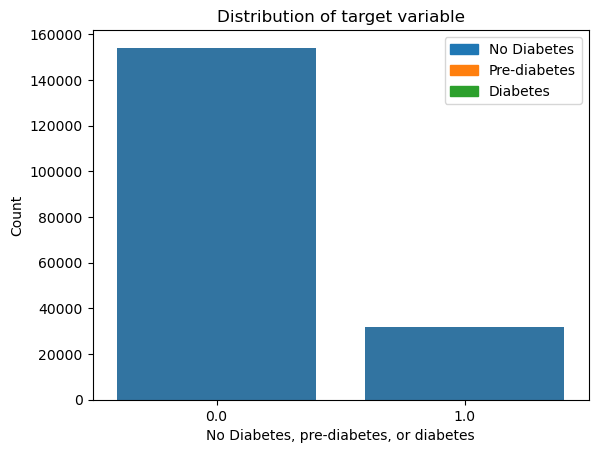

In [14]:
# visualize train data class distributions 
target_col = df.columns[0]
df_excluded = df.drop(columns=[target_col])
train_df = pd.DataFrame(train_x, columns=df_excluded.columns)
train_df['Diabetes_012'] = train_y 

sns.countplot(x='Diabetes_012', data=train_df)
plt.xlabel('No Diabetes, pre-diabetes, or diabetes')
plt.ylabel('Count')
plt.title('Distribution of target variable')

legend_labels = ['No Diabetes', 'Pre-diabetes', 'Diabetes']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in sns.color_palette()[:3]]  
plt.legend(legend_handles, legend_labels)

plt.show()

In [15]:
def smotedata(x, y):
    # # #3: Apply SMOTE: generates synthetic samples for the minority class to balance the class distribution
    smote = SMOTE(random_state=seed)
    X_smote, y_smote = smote.fit_resample(x, y)

    target_distribution = y_smote.value_counts()
    print(target_distribution)
    
    # set train_df to whichever data imbalance technique we want to use
    smote_df = pd.DataFrame(X_smote, columns=df_excluded.columns)
    smote_df['Diabetes_012'] = y_smote 
    return smote_df

In [16]:
# grab all the data as a numpy matrix.
all_xy = df.to_numpy()
# get features and target seperately.
all_x = all_xy[:, 1:]
all_y = all_xy[:, 0]

col_names = [c for c in df.columns]
features = col_names[1:]
target = col_names[0]
target_names = ['No diabetes', 'Pre-diabetes', 'Diabetes']
n_classes = 3

## Evaluation and Hyperparameter tuning.

In [17]:
# Evaluate model.
def evaluate_model(model, y_true, y_pred, test_x, target_names, n_classes ):
    report = classification_report(y_true, y_pred)
    print(report)
    
    # For accuracy.
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy of model ", model.__class__.__name__,": ", round(accuracy,4))
    
    # For recall.
    recall = recall_score(y_true, y_pred, average = None)
    for class_id in range(n_classes):
        print(f"Recall of model for the {target_names[class_id]} class", model.__class__.__name__,": ", round(recall[class_id], 4))
    
    # For ROC curve.
    fig, ax = plt.subplots(figsize=(6, 6))
    for class_id in range(n_classes):
        prob_pred = model.predict_proba(test_x)
        fpr, tpr, _ = roc_curve(y_true == class_id, prob_pred[:, class_id])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {target_names[class_id]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

def combined_evaluate_model(y_true, y_pred, prob_pred, target_names, n_classes ):
    report = classification_report(y_true, y_pred)
    print(report)
    
    # For accuracy.
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy of model : ", round(accuracy,4))
    
    # For recall.
    recall = recall_score(y_true, y_pred, average = None)
    for class_id in range(n_classes):
        print(f"Recall of model for the {target_names[class_id]} class: ", round(recall[class_id], 4))
        
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    cm = confusion_matrix(y_true, y_pred, labels=[0,1,2])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2])
    disp.plot()
    
    plt.figure(figsize=(8, 6))
    classes = [0,1,2]
    for i in range(len(classes)):
        fpr, tpr, _ = roc_curve(y_true == i, prob_pred[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.savefig('ROC_Curve_DAC_weighted.jpg', dpi=400)
    plt.show()
        
# Hyperparameter tuning.
def hyperparameter_tuning(model, param_grid, x, y, cv=8, scoring='accuracy'):
    
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, scoring=scoring, verbose = 10, cv=cv)
    grid_search.fit(x, y)
    best_model = grid_search.best_estimator_
    print(best_model)
    return best_model


In [18]:
# Boosting.
def trainXGB(train_x, train_y, val_x, val_y, param_grid, cv=8):

    x = np.concatenate((train_x, val_x), axis=0)
    y = np.concatenate((train_y, val_y), axis=0)
    counter = Counter(y)
    estimate = counter[0] / counter[1]
    print(estimate)
    model = hyperparameter_tuning(xgb.XGBClassifier(random_state=seed, scale_pos_weight=estimate), param_grid, x, y, cv)
    model.fit(train_x, train_y)
    return model


def trainAdaBoost(train_x, train_y, val_x, val_y, param_grid):
    
    x = np.concatenate((train_x, val_x), axis=0)
    y = np.concatenate((train_y, val_y), axis=0)
    model = hyperparameter_tuning(AdaBoostClassifier(random_state=seed), param_grid, x, y)
    model.fit(train_x, train_y)
    return model


def trainGradientBoost(train_x, train_y, val_x, val_y, param_grid):

    x = np.concatenate((train_x, val_x), axis=0)
    y = np.concatenate((train_y, val_y), axis=0)
    model = hyperparameter_tuning(GradientBoostingClassifier(random_state=seed), param_grid, x, y)
    model.fit(train_x, train_y)
    return model
  
    
def trainLR(train_x, train_y, val_x, val_y, param_grid, cv=8):

    x = np.concatenate((train_x, val_x), axis=0)
    y = np.concatenate((train_y, val_y), axis=0)
    model = hyperparameter_tuning(LogisticRegression(random_state=seed, class_weight = 'balanced'), param_grid, x, y, cv, make_scorer(recall_score, pos_label=1))
    model.fit(train_x, train_y)
    return model

def LRFI(features, model):
    feature_importance = pd.DataFrame({'Feature': features, 'Importance': np.abs(model.coef_[0])})
    feature_importance = feature_importance.sort_values('Importance', ascending=True)
    feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [19]:

def class0vs1and2classifier(train_x, val_x, train_y, val_y ):
    
    # Change label 2 to 1
    train_y_changed = train_y.copy()
    train_y_changed = train_y_changed.replace(2, 1)
    
    val_y_changed = val_y.copy()
    val_y_changed = val_y_changed.replace(2, 1)
    
    test_y_changed = test_y.copy()
    test_y_changed = test_y_changed.replace(2, 1)

    
    param_grid = {
        # 'C' : [1, 0.1, 0.01, 0.001],
        'C' : [0.01],
        'penalty': ['l1'],
        'solver': ['saga']
    }
    
    LRmodel =  trainLR(train_x, train_y_changed, val_x, val_y_changed, param_grid, cv=8)
    LR_y_pred = LRmodel.predict(test_x)
    n_classes = 2
    evaluate_model(LRmodel, test_y_changed, LR_y_pred, test_x, ['No diabetes', 'Pre-diabetes/Diabetes'], n_classes)
    LRFI(features, LRmodel)
    
    return LRmodel

    
def class1vs2classifier(originallabels, train_x, val_x, train_y, val_y):
    
    # Get class 2 label indexes
    class_2_indices_original = originallabels[originallabels == 2].index

    # change label from 1 to 2 in train, val and test
    train2idx = list(set(list(train_y.index)) & set(list(class_2_indices_original)))
    val2idx = list(set(list(val_y.index)) & set(list(class_2_indices_original)))
    test2idx = list(set(list(test_y.index)) & set(list(class_2_indices_original)))
    
    train_y_changed = train_y.copy()
    train_y_changed.loc[train2idx] = 2

    val_y_changed = val_y.copy()
    val_y_changed.loc[val2idx] = 2

    test_y_changed = test_y.copy()
    test_y_changed.loc[test2idx] = 2
    
    print((test_y_changed).value_counts())

    #drop class 0 to train model
    indices_to_keep = np.where(train_y_changed != 0)[0]
    # Filter train_x and train_y based on the indices
    train_x_filtered = train_x[indices_to_keep]
    train_y_filtered = (train_y_changed.reset_index(drop=True))[indices_to_keep]
    # 0 class will be diabetes now
    train_y_filtered[train_y_filtered == 2] = 0

    indices_to_keep = np.where(val_y_changed != 0)[0]
    # Filter train_x and train_y based on the indices
    val_x_filtered = val_x[indices_to_keep]
    val_y_filtered = (val_y_changed.reset_index(drop=True))[indices_to_keep]
    val_y_filtered[val_y_filtered == 2] = 0

    indices_to_keep = np.where(test_y_changed != 0)[0]
    # Filter train_x and train_y based on the indices
    test_x_filtered = test_x[indices_to_keep]
    test_y_filtered = (test_y_changed.reset_index(drop=True))[indices_to_keep]
    test_y_filtered[test_y_filtered == 2] = 0
    
    param_grid = {
        #'C' : [1, 0.1, 0.01, 0.001],
        'C' : [1],

    }

    LRmodel =  trainLR(train_x_filtered, train_y_filtered, val_x_filtered, val_y_filtered, param_grid, cv=8)
    LR_y_pred = LRmodel.predict(test_x_filtered)
    n_classes = 2
    evaluate_model(LRmodel, test_y_filtered, LR_y_pred, test_x_filtered, ['Diabetes', 'Pre-diabetes'], n_classes)
    LRFI(features, LRmodel)
    return LRmodel

def combinednewclassifier(originallabels, model1, model2, test_x, test_y):

    model1_predict = model1.predict(test_x)
    model1_predict_series = pd.Series(model1_predict)
    indexes_to_change = model1_predict_series[model1_predict_series==1].index
    # Filter train_x and train_y based on the indices
    x_class_1 = test_x[indexes_to_change]
    
    model2_predict = model2.predict(x_class_1)
    # Turn 0 class to diabetes label
    model2_predict = np.where(model2_predict == 0, 2, 1)
    
    final_predict_proba = model1.predict_proba(test_x)
    final_predict_proba = np.hstack((final_predict_proba, np.zeros((final_predict_proba.shape[0], 1))))

    final_preds = model1_predict_series
    final_preds.loc[indexes_to_change] = model2_predict
    final_predict_proba[indexes_to_change, 1] = model2.predict_proba(x_class_1)[:,1]
    final_predict_proba[indexes_to_change, 2] = model2.predict_proba(x_class_1)[:,0]
    final_predict_proba[indexes_to_change, 0] = 0
    
    class_2_indices_original = originallabels[originallabels == 2].index
    test2idx = list(set(list(test_y.index)) & set(list(class_2_indices_original)))
    modified_test_y = test_y.copy()
    modified_test_y.loc[test2idx] = 2
    
    combined_evaluate_model(modified_test_y, final_preds, final_predict_proba, ['No diabetes', 'Pre-diabetes', 'Diabetes'], 3)
    


Fitting 8 folds for each of 1 candidates, totalling 8 fits
[CV 1/8; 1/1] START C=0.01, penalty=l1, solver=saga.............................
[CV 1/8; 1/1] END C=0.01, penalty=l1, solver=saga;, score=0.889 total time=   2.8s
[CV 2/8; 1/1] START C=0.01, penalty=l1, solver=saga.............................
[CV 2/8; 1/1] END C=0.01, penalty=l1, solver=saga;, score=0.886 total time=   2.3s
[CV 3/8; 1/1] START C=0.01, penalty=l1, solver=saga.............................
[CV 3/8; 1/1] END C=0.01, penalty=l1, solver=saga;, score=0.891 total time=   2.8s
[CV 4/8; 1/1] START C=0.01, penalty=l1, solver=saga.............................
[CV 4/8; 1/1] END C=0.01, penalty=l1, solver=saga;, score=0.892 total time=   2.8s
[CV 5/8; 1/1] START C=0.01, penalty=l1, solver=saga.............................
[CV 5/8; 1/1] END C=0.01, penalty=l1, solver=saga;, score=0.886 total time=   2.6s
[CV 6/8; 1/1] START C=0.01, penalty=l1, solver=saga.............................
[CV 6/8; 1/1] END C=0.01, penalty=l1, so

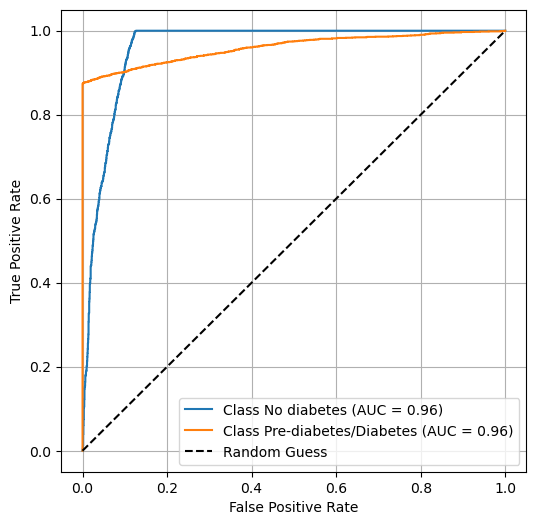

Diabetes_012
0.0    9516
2.0    1725
1.0     249
Name: count, dtype: int64
Fitting 8 folds for each of 4 candidates, totalling 32 fits
[CV 1/8; 1/4] START C=1.........................................................
[CV 1/8; 1/4] END ..........................C=1;, score=1.000 total time=   0.2s
[CV 2/8; 1/4] START C=1.........................................................
[CV 2/8; 1/4] END ..........................C=1;, score=1.000 total time=   0.1s
[CV 3/8; 1/4] START C=1.........................................................
[CV 3/8; 1/4] END ..........................C=1;, score=1.000 total time=   0.1s
[CV 4/8; 1/4] START C=1.........................................................
[CV 4/8; 1/4] END ..........................C=1;, score=1.000 total time=   0.1s
[CV 5/8; 1/4] START C=1.........................................................
[CV 5/8; 1/4] END ..........................C=1;, score=1.000 total time=   0.1s
[CV 6/8; 1/4] START C=1................................

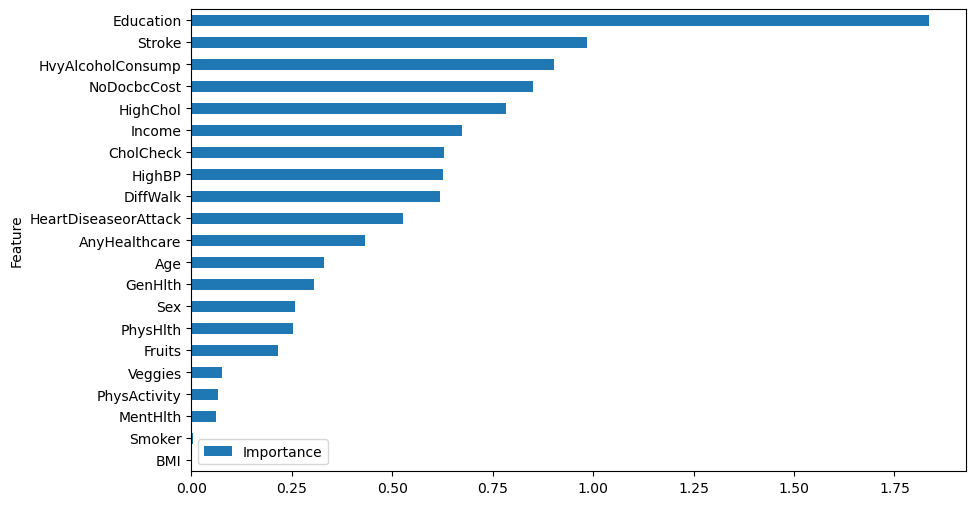

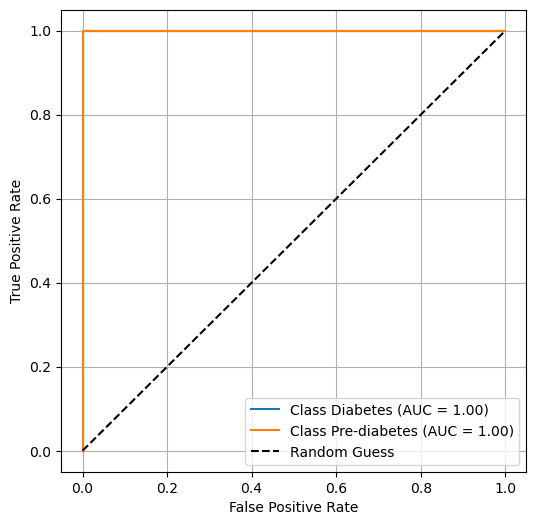

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      9516
         1.0       0.07      0.04      0.05       249
         2.0       1.00      1.00      1.00      1725

    accuracy                           0.97     11490
   macro avg       0.68      0.68      0.68     11490
weighted avg       0.96      0.97      0.96     11490

Accuracy of model :  0.9681
Recall of model for the No diabetes class:  0.9867
Recall of model for the Pre-diabetes class:  0.0402
Recall of model for the Diabetes class:  1.0


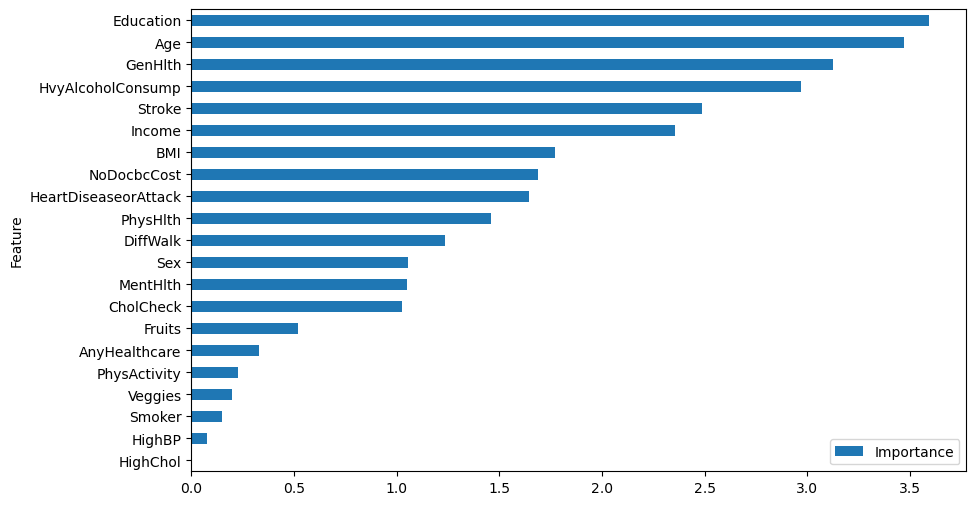

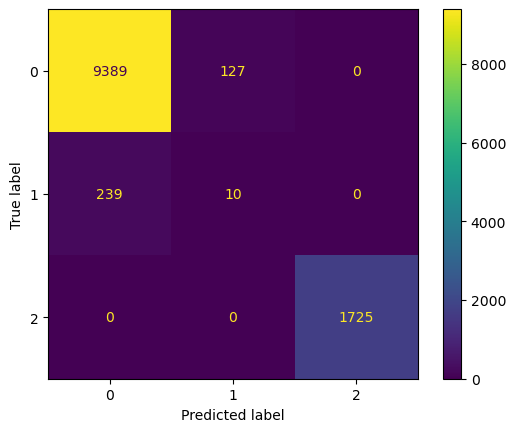

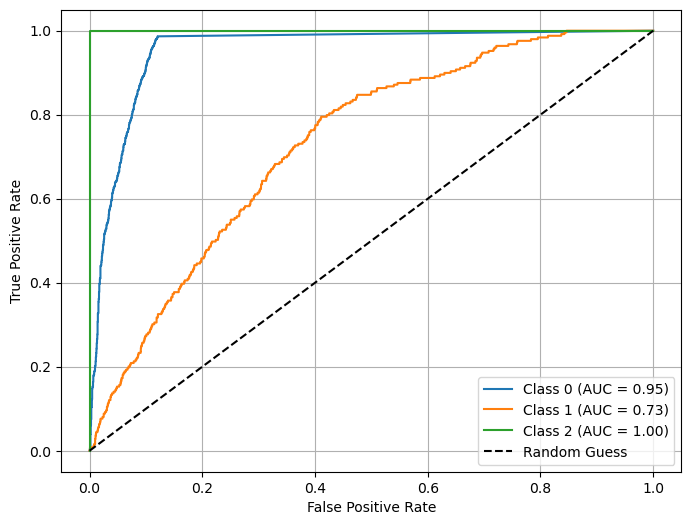

In [20]:
model1 = class0vs1and2classifier(train_x, val_x, train_y, val_y )
model2 = class1vs2classifier(originallabels,  train_x, val_x, train_y, val_y,)
combinednewclassifier(originallabels, model1, model2, test_x, test_y)